In [1]:
import pandas as pd
from matplotlib import pyplot
#https://tutorials.datasciencedojo.com/mean-absolute-error-forecast/
#https://code.datasciencedojo.com/rebeccam/tutorials/blob/master/Time%20Series/py_time_series_example.py


In [2]:
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics

In [3]:
hourly_sentiment_series = pd.read_csv('hourly_users_sentiment_subset.csv')
type(hourly_sentiment_series)

pandas.core.frame.DataFrame

In [4]:
hourly_sentiment_series = pd.read_csv('hourly_users_sentiment_subset.csv',
                                     index_col=0,
                                     parse_dates=True,
                                     squeeze=True ) #time series 
type(hourly_sentiment_series)

pandas.core.series.Series

In [5]:
hourly_sentiment_series.head(2)

datetime
2019-02-06 00:00:00   -0.000745
2019-02-06 01:00:00   -0.099152
Name: users_sentiment_score, dtype: float64

In [6]:
hourly_sentiment_series[0]

-0.000745

In [7]:
print(hourly_sentiment_series.index)

# Preview the data to get an idea of the values and sample size
print(hourly_sentiment_series.tail())
print(hourly_sentiment_series.shape)


DatetimeIndex(['2019-02-06 00:00:00', '2019-02-06 01:00:00',
               '2019-02-06 02:00:00', '2019-02-06 03:00:00',
               '2019-02-06 04:00:00', '2019-02-06 05:00:00',
               '2019-02-06 06:00:00', '2019-02-06 07:00:00',
               '2019-02-06 08:00:00', '2019-02-06 09:00:00',
               '2019-02-06 10:00:00', '2019-02-06 11:00:00',
               '2019-02-06 12:00:00', '2019-02-06 13:00:00',
               '2019-02-06 14:00:00', '2019-02-06 15:00:00',
               '2019-02-06 16:00:00', '2019-02-06 17:00:00',
               '2019-02-06 18:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)
datetime
2019-02-06 14:00:00   -0.002736
2019-02-06 15:00:00   -0.029604
2019-02-06 16:00:00    0.022578
2019-02-06 17:00:00   -0.005919
2019-02-06 18:00:00   -0.006468
Name: users_sentiment_score, dtype: float64
(19,)


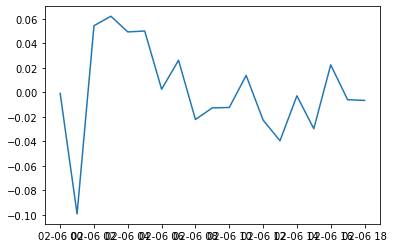

In [8]:
#stationary data means : data is consistent up and down path like ECG graph of heart 
pyplot.plot(hourly_sentiment_series)
pyplot.show()

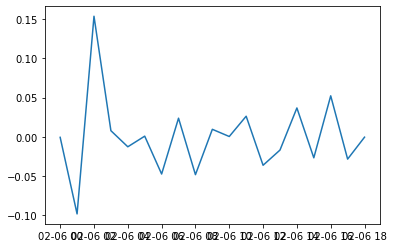

In [9]:
#differencing means probably decrease next point to make stationary 
hourly_sentiment_series_diff1 = hourly_sentiment_series.diff().fillna(hourly_sentiment_series)
pyplot.plot(hourly_sentiment_series_diff1)
pyplot.show()

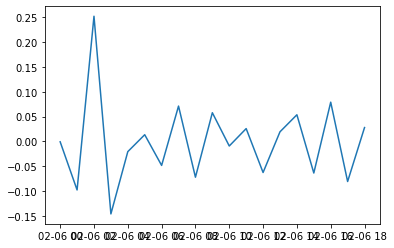

In [10]:

hourly_sentiment_series_diff2 = hourly_sentiment_series_diff1.diff().fillna(hourly_sentiment_series_diff1)
pyplot.plot(hourly_sentiment_series_diff2)
pyplot.show()

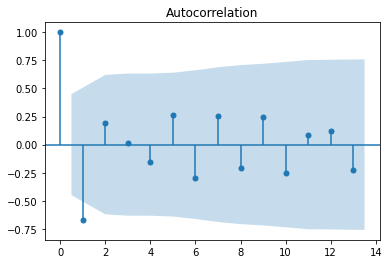

In [11]:

plot_acf(hourly_sentiment_series_diff2)
pyplot.show()
#anything comming out of blue/shaded area determines: statically co-relation 
#ACF significant X, helps in moving average term MA

C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


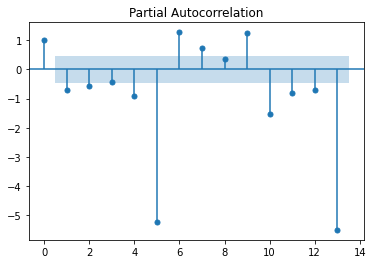

In [12]:
plot_pacf(hourly_sentiment_series_diff2)
pyplot.show()
#PACF significant X, helps in auto regressive terms AR

In [13]:
#ARMA1model_hourly_sentiment= ARIMA(hourly_sentiment_series,order=(5,2,1)).fit(transparams=False)
#AR-MA terms differencing, 5 AR terms,2 set of differences, 1-MA 
#transparams=False, keeps model stationary 
ARMA1model_hourly_sentiment = ARIMA(hourly_sentiment_series, order=(5,2,1)).fit(transparams=False)


C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [14]:
ARMA1model_hourly_sentiment.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D2.users_sentiment_score   No. Observations:                   17
Model:                       ARIMA(5, 2, 1)   Log Likelihood                  27.731
Method:                             css-mle   S.D. of innovations              0.041
Date:                      Sun, 16 Aug 2020   AIC                            -39.462
Time:                              08:44:46   BIC                            -32.796
Sample:                          02-06-2019   HQIC                           -38.799
                               - 02-06-2019                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0007      0.001     -0.505      0.613      -0.004       0.002
ar.L1.D2.users_sentiment_score    -0.5012      0.266     -1.883      0.060      -1.023       0.020
ar.L2.D2.users_sentiment_score     0.0275      0.441      0.062      0.950      -0.838       0.892
ar.L3.D2.users_sentiment_score    -0.1337      0.472     -0.284      0.777      -1.058       0.790
ar.L4.D2.users_sentiment_score    -0.2745      0.462     -0.595      0.552      -1.179       0.630
ar.L5.D2.users_sentiment_score     0.1875      0.377      0.497      0.619      -0.552       0.927
ma.L1.D2.users_sentiment_score    -1.0000      0.219     -4.558      0.000      -1.430      -0.570
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9567           -0.5667j            1.1119           -0.4149
AR.2           -0.9567           +0.5667j            1.1119            0.4149
AR.3            0.5789           -1.2680j            1.3939           -0.1818
AR.4            0.5789           +1.2680j            1.3939            0.1818
AR.5            2.2195           -0.0000j            2.2195           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

## if p value of AR,MA is > 0.05 i.e significant model
than its not significant if >0.05
ma.L1.D2.users_sentiment_score only considered from summary BECAUSE P>|z| = 0.00

In [15]:
ARMA1predict_5hourly_sentiment=ARMA1model_hourly_sentiment.predict('2/6/2019  7:00:00 PM','2/6/2019  11:00:00 PM',typ='levels')
print('Forecast/preditions for 5 hours ahead from 19-23hours: \n', ARMA1predict_5hourly_sentiment)

Forecast/preditions for 5 hours ahead from 19-23hours: 
 2019-02-06 19:00:00   -0.008694
2019-02-06 20:00:00   -0.033363
2019-02-06 21:00:00   -0.014812
2019-02-06 22:00:00   -0.042334
2019-02-06 23:00:00   -0.038092
Freq: H, dtype: float64


In [16]:
ARMA1predict_5hourly_sentiment[0]

-0.008694172633749529

back transform with out D-difference original 

In [17]:
undiff1= hourly_sentiment_series_diff2.cumsum().fillna(hourly_sentiment_series_diff2)
undiff2 =undiff1.cumsum().fillna(undiff1)


In [18]:
print(all(round(hourly_sentiment_series,6)==round(undiff2,6)))

True


In [19]:
print('Original values\n', hourly_sentiment_series.head())
print('\n De-differenced values \n', undiff2.head())

Original values
 datetime
2019-02-06 00:00:00   -0.000745
2019-02-06 01:00:00   -0.099152
2019-02-06 02:00:00    0.054502
2019-02-06 03:00:00    0.062236
2019-02-06 04:00:00    0.049438
Name: users_sentiment_score, dtype: float64

 De-differenced values 
 datetime
2019-02-06 00:00:00   -0.000745
2019-02-06 01:00:00   -0.099152
2019-02-06 02:00:00    0.054502
2019-02-06 03:00:00    0.062236
2019-02-06 04:00:00    0.049438
Name: users_sentiment_score, dtype: float64


In [20]:
hourly_sentiment_full_actual = pd.read_csv('hourly_users_sentiment_sample.csv',
                                           index_col=0, 
                                           parse_dates=True,
                                           squeeze=True)
print(hourly_sentiment_full_actual.tail(),'\n')
indx_row_values = hourly_sentiment_full_actual.index[19:24]
print(indx_row_values)

datetime
2019-02-06 19:00:00   -0.00684
2019-02-06 20:00:00   -0.05754
2019-02-06 21:00:00   -0.00799
2019-02-06 22:00:00   -0.00843
2019-02-06 23:00:00   -0.00934
Name: users_sentiment_score, dtype: float64 

DatetimeIndex(['2019-02-06 19:00:00', '2019-02-06 20:00:00',
               '2019-02-06 21:00:00', '2019-02-06 22:00:00',
               '2019-02-06 23:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)


In [22]:
print(type(hourly_sentiment_full_actual))
print(type(predicted_series_value));
print(type(hourly_sentiment_series))

<class 'pandas.core.series.Series'>


NameError: name 'predicted_series_value' is not defined

In [23]:
#or pass these using pandas 
predicted_series_value= pd.Series(ARMA1predict_5hourly_sentiment,
                                 index=['2019-02-06 19:00:00',
                                        '2019-02-06 20:00:00',
                                        '2019-02-06 21:00:00',
                                        '2019-02-06 22:00:00',
                                        '2019-02-06 23:00:00'],name='users_sentiment_score')

In [24]:
hourly_sentiment_full_predicted= hourly_sentiment_series.append(predicted_series_value,verify_integrity=True)

In [25]:
#hourly_sentiment_full_predicted =pd.concat(hourly_sentiment_series,predicted_series_value)

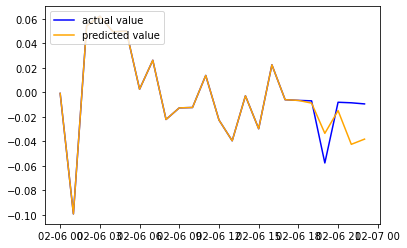

In [28]:
pyplot.plot(hourly_sentiment_full_actual, c='blue', label='actual value')
pyplot.plot(hourly_sentiment_full_predicted, c='orange', label='predicted value')
pyplot.legend(loc='upper left')
pyplot.show()

In [29]:
#Calculate the MAE to evaluate the model and see if there's

actual_value_handout = hourly_sentiment_full_actual.iloc[19:24]
predicted_value_handout = hourly_sentiment_full_predicted.iloc[19:24]
prediction_errors =[]

In [30]:
for i  in range(len(actual_value_handout)):
    err =actual_value_handout[i] -predicted_value_handout[i]
    prediction_errors.append(err)

In [31]:
prediction_errors

[0.001854172633749528,
 -0.02417650802657708,
 0.006822295927183811,
 0.0339041526025451,
 0.028751918740961703]

In [32]:
mean_absolute_error =statistics.mean(map(abs,prediction_errors))
print('Mean absolute error ',mean_absolute_error)

Mean absolute error  0.019101809586203444


In [33]:
test_results = adfuller(hourly_sentiment_series_diff2)

In [34]:
print('p-value : ',test_results[1])

p-value :  6.24978479363152e-08
